# Beginning Project Dashboard

Oh boy here goes a bunch of stuff

In [96]:
# Common imports from Python standard libraries
from dataclasses import dataclass
import math

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import time
import datetime as dt
import dateutil as du

# Science imports
import scipy
from scipy import stats
from scipy import cluster
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import sklearn.metrics
from statistics import mean

# Useful imports for visualization
import seaborn
import networkx as nx
import pyvis as pv
import plotly as py

# Plotly express and dash
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


# Constants
EPS = 0.0000001
FINAL = False

# Some useful functions
def almost_equal(a,b,eps=EPS):
    return abs(a-b) <= eps

def binsearch(func, vv = 0.025, x_l = -100, x_r = 100, eps=0.00001):
    '''
    Search for x such that func(x) == vv,
    within a range of +- eps,
    with x between x_l and x_r.
    '''
    v_l = func(x_l)
    v_r = func(x_r)
    
    x_m = (x_l + x_r)/2
    v_m = func(x_m)
    
    while abs(v_m - vv) >= eps:
        if v_m < vv:
            x_l = x_m
        elif v_m > vv:
            x_r = x_m
        else:
            print("weird, this shouldn't be possible")
            return x_m
            
        v_l = func(x_l)
        v_r = func(x_r)
        x_m = (x_l + x_r)/2
        v_m = func(x_m)
    
    return x_m

# Code provided from HW4
def stdev(X):
    m = mean(X)
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 /
(len(Y) - 1))
    return(df)



In [2]:
df_full = pd.read_csv("../DATASETS/US_Accidents_Dec20_updated.csv")

In [3]:
df_full

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [15]:
df = df_full.sample(n = 3000, ignore_index = True)

df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-3206241,2,2020-11-11 18:35:00,2020-11-11 22:45:00,35.392380,-80.851939,35.404710,-80.856589,0.891,In Huntersville / Mile Marker 22 Heading North...,...,False,False,False,False,False,False,Night,Night,Night,Day
1,A-3580937,2,2020-03-15 01:34:00,2020-03-15 02:06:48,33.996178,-117.870278,33.996178,-117.870278,0.000,At CA-60/Pomona Fwy - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3446307,2,2020-05-26 11:21:32,2020-05-26 13:21:32,45.063560,-122.965410,45.063560,-122.965410,0.000,At Brooklake Rd/Exit 263 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-3923546,2,2019-01-10 10:39:18,2019-01-10 11:08:39,38.872687,-77.290150,38.875482,-77.280664,0.546,At Vaden Dr/Exit 62 - Accident. Left lane bloc...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-3370010,2,2020-11-09 16:55:00,2020-11-09 18:50:11,30.505894,-84.250596,30.504858,-84.251042,0.076,Incident on SB THOMASVILLE RD SB near CAPITAL ...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,A-3011241,2,2020-12-03 16:48:31,2020-12-03 18:54:00,41.758950,-72.700309,41.771001,-72.678965,1.380,Stationary traffic on I-84 E - US-6 E from Fla...,...,False,False,False,False,False,False,Night,Day,Day,Day
2996,A-4135919,3,2017-10-20 16:26:43,2017-10-20 22:26:43,41.952380,-87.728410,41.955860,-87.734570,0.397,At Keeler Ave/Exit 44A - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2997,A-3464823,2,2020-06-04 10:31:52,2020-06-04 11:21:50,28.477850,-80.769150,28.477850,-80.769150,0.000,At Fay Blvd - Serious accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
2998,A-3924929,3,2019-01-12 13:06:17,2019-01-12 13:35:59,29.955890,-95.418510,29.948880,-95.417050,0.492,At Greens Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


# 2. Start up dashboard.

Oh man.

Need to do:

- Clustering
    - Hierarchical
    - K-Means
- Gaussian Mixture Model (classification)
- Network Analysis (visualization)
- Correlation Analysis:
    - Linear regression
    - Pearson correlation
    - Kernel Density Estimate
- Hypothesis testing
    - t-test
    - p-value
- Statistics
    - Boxplots
    - Violin plots
    - Histogram
- Geospatial Analysis
    - Cartogram map
- NLP / text mining:
    - Word cloud
    - Bar plot
- Basics:
    - Line graph


## (1) Boxplots, Violin Plots

Let's use these to understand the **distance** of the accidents, and how it relates to these keys:

1. 'Stop'
2. 'Traffic_Calming'
3. 'Roundabout'
4. 'Traffic_Signal'


In [5]:
dist_checklist_keys = ['Stop', 'Traffic_Calming', 'Roundabout', 'Traffic_Signal', 'Crossing', 'Railway', 'Bump']

In [6]:
df.keys()

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
print(set(df['Severity']))

distance_by_severity = {severity : np.array(df[df['Severity'] == severity]['Distance(mi)']) for severity in set(df['Severity'])}

distance_by_severity.keys()

{1, 2, 3, 4}


dict_keys([1, 2, 3, 4])

In [8]:
app = dash.Dash(name="Distance by different traffic conditions")

app.layout = html.Div(
    [
        html.Div(
            [
                html.H2("Do traffic controls mitigate the impact of accidents?"),
                html.P('''
A serious traffic accident can leave one or more lanes of a road unusable.
After an accident, we measure the *distance* of affected road in miles.
Use this tool and explore how the severity of accidents relate to the presence of
traffic controls such as stop signs, traffic signals, roundabouts, traffic crossings,
train railways, speed-bumps, and 'traffic-calming' techniques
                '''),
                dcc.Checklist(
                    id = "severity-checklist",
                    options = [{'value' : str(x), 'label' : f'{str(x)}'}
                               for x in dist_checklist_keys],
                               #for x in [1, 2, 3, 4]],
                    value   = [],
                    labelStyle = {'display' : 'inline-block'}
                ),
            ]
        ),
        dcc.Graph(id = "severity-distance-boxplot")
    ]
)


@app.callback(
    Output("severity-distance-boxplot", "figure"), 
    [Input("severity-checklist", "value")]
)
def generate_plot(x):
    fig = px.violin(
        df,
        x = x,
        y = 'Distance(mi)',
        box = True,
        points='all'
    )
    return fig


app.run_server(port = 10001, debug=False)

Dash is running on http://127.0.0.1:10001/

 * Serving Flask app 'Distance by different traffic conditions' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:10001/ (Press CTRL+C to quit)


## (2) Histogram and KDE estimation

- Clustering
    - Hierarchical
    - K-Means
- Gaussian Mixture Model (classification)
- Network Analysis (visualization)
- Correlation Analysis:
    - Linear regression
    - Pearson correlation
    - Kernel Density Estimate
- Hypothesis testing
    - t-test
    - p-value
- Statistics
    - ~~Boxplots~~
    - ~~Violin plots~~
    - Histogram
- Geospatial Analysis
    - Cartogram map
- NLP / text mining:
    - Word cloud
    - Bar plot
- Basics:
    - Line graph


Let's do **KDE and Histogram** now.

How present are the following weather conditions in traffic accidents?



In [38]:
weather_keys = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

app = dash.Dash(name="Weather conditions and traffic accidents")

app.layout = html.Div(
    [
        html.Div(
            [
                html.H2("abc"),
                html.P('''
Explore the distribution of different weather conditions during traffic accidents.
                '''),
            ]
        ),
        html.Div(
            [
                dcc.Graph(id = "weather-kde"),
                dcc.Checklist(
                    id = "weather-checklist",
                    options = [{'value' : str(x), 'label' : f'{str(x)}'}
                               for x in weather_keys],
                               #for x in [1, 2, 3, 4]],
                    value   = ["Temperature(F)"],
                    labelStyle = {'display' : 'inline-block'}
                ),
                dcc.Slider(
                    id="weather-binsize",
                    min=0.1,
                    max=10.1,
                    value=1.0, 
                    marks = {x : str(x) for x in [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]}
                )
            ]
        )
                
    ]
)


@app.callback(
    Output("weather-kde", "figure"), 
    [Input("weather-checklist", "value"),
     Input("weather-binsize", "value")
    ]
)
def generate_plot(labels, binsize):
    '''
    fig = px.histogram(
        df,
        x = x,
        #marginal = 'violin',
        histnorm = 'probability density',
        nbins = bins
    )
    return fig
    '''
    data = np.nan_to_num(np.array(df[labels]), copy=True, nan=0.0, posinf=0.0, neginf=0.0).T
    fig = ff.create_distplot(data, labels, bin_size=binsize)
    return fig


app.run_server(port = 10001, debug=False)

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

 * Serving Flask app '1234' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:10001/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Dec/2021 13:39:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2021 13:39:40] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2021 13:39:40] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2021 13:39:40] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2021 13:39:40] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2021 13:39:40] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2021 13:39:40] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2021 13:39:40] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2021 13:39:44] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2021 13:39:46] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2021 13:39:48] "POST /_dash-update-component HTTP/1.1" 2

In [29]:
#ff.create_distplot(
#    hist_data = np.nan_to_num(np.array(df[weather_keys]), copy=True, nan=0.0, posinf=0.0, neginf=0.0).T,
#    group_labels = weather_keys
#)

## (3) Hypothesis Testing

- Clustering
    - Hierarchical
    - K-Means
- Gaussian Mixture Model (classification)
- Network Analysis (visualization)
- Correlation Analysis:
    - Linear regression
    - Pearson correlation
    - ~~Kernel Density Estimate~~
- Hypothesis testing
    - t-test
    - p-value
- ~~Statistics~~
    - ~~Boxplots~~
    - ~~Violin plots~~
    - ~~Histogram~~
- Geospatial Analysis
    - Cartogram map
- NLP / text mining:
    - Word cloud
    - Bar plot
- Basics:
    - Line graph


Let's do a t-test against this null hypothesis: **The presence of stop signs have no impact on the distance of an accident.**

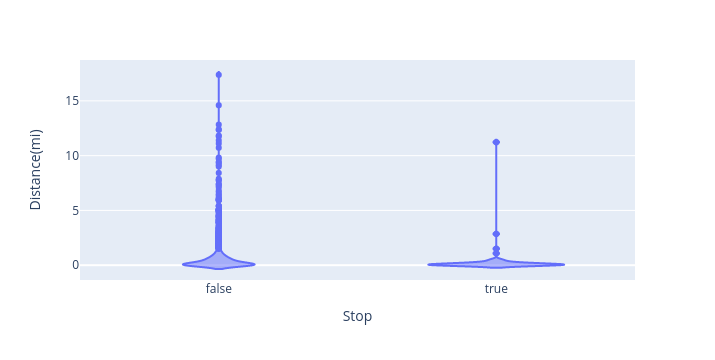

In [70]:
px.violin(df, 'Stop', 'Distance(mi)')

In [104]:
df.keys()

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

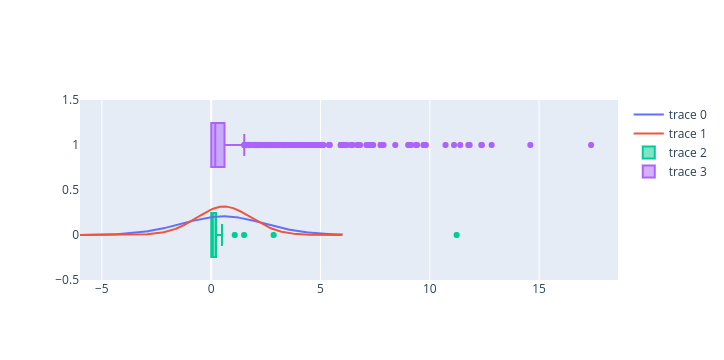

In [146]:

test_keys = ['Stop', 'Crossing', 'Traffic_Calming', 'Traffic_Signal']
metrics = ['Distance(mi)', 'Severity']

def get_figure(key = 'Stop', metric = 'Distance(mi)', show_boxes=True):
    # From our dataframe, get items with and without boolean key
    key_with = df[df[key] == True][metric]
    key_without = df[df[key] == False][metric]

    # get degrees of freedom
    v_obs = degreesOfFreedom(key_with, key_without)

    # Get the t-pdf of our two values
    pdf_with = lambda x: stats.t.pdf(
        x, df = v_obs, loc = key_with.mean(), scale = key_with.std()
    )
    pdf_without = lambda x: stats.t.pdf(
        x, df = v_obs, loc = key_without.mean(), scale = key_without.std()
    )

    # get statistics
    t_obs, p_obs = scipy.stats.ttest_ind(dist_at_stop, dist_no_stop)

    # Lines for graphing
    Xs = np.linspace(-6, 6, 1000)
    Ys_with = [pdf_with(x) for x in Xs]
    Ys_without = [pdf_without(x) for x in Xs]

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=Xs, y=Ys_with, mode='lines')
    )
    fig.add_trace(
        go.Scatter(x=Xs, y=Ys_without, mode='lines')
    )
    
    if show_boxes:
        fig.add_trace(
            go.Box(x=key_with)
        )
        fig.add_trace(
            go.Box(x=key_without)
        )
    
    return fig

get_figure().show()

0.13519759782138538 0.8924647223600679
2.2222222222222223 2.233805668016194


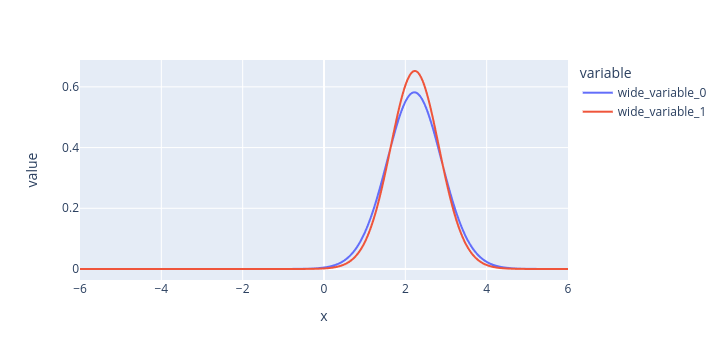

In [117]:

test_keys = ['Stop', 'Crossing', 'Traffic_Calming', 'Traffic_Signal']
metrics = ['Distance(mi)', 'Severity']

def get_figure(key = 'Stop', metric = 'Distance(mi)'):
    # From our dataframe, get items with and without boolean key
    key_with = df[df[key] == True][metric]
    key_without = df[df[key] == False][metric]

    # get degrees of freedom
    v_obs = degreesOfFreedom(key_with, key_without)

    # Get the t-pdf of our two values
    pdf_with = lambda x: stats.t.pdf(
        x, df = v_obs, loc = key_with.mean(), scale = key_with.std()
    )

    pdf_without = lambda x: stats.t.pdf(
        x, df = v_obs, loc = key_without.mean(), scale = key_without.std()
    )

    # get statistics
    t_obs, p_obs = scipy.stats.ttest_ind(dist_at_stop, dist_no_stop)

    #print(t_obs, p_obs)
    #print(key_with.mean(), key_without.mean())
    Xs = np.linspace(-6, 6, 1000)
    Ys_with = [pdf_with(x) for x in Xs]
    Ys_without = [pdf_without(x) for x in Xs]
    #px.line(x=Xs, y=Ys_with)
    #px.line(x=Xs, y=Ys_without)
    px.line(x=Xs, y=[Ys_with, Ys_without])

In [84]:
dist_without.mean()

0.5818215249662619